<a href="https://colab.research.google.com/github/solracmendo/k_brazos_MLSG/blob/main/bandit_experiment_2_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

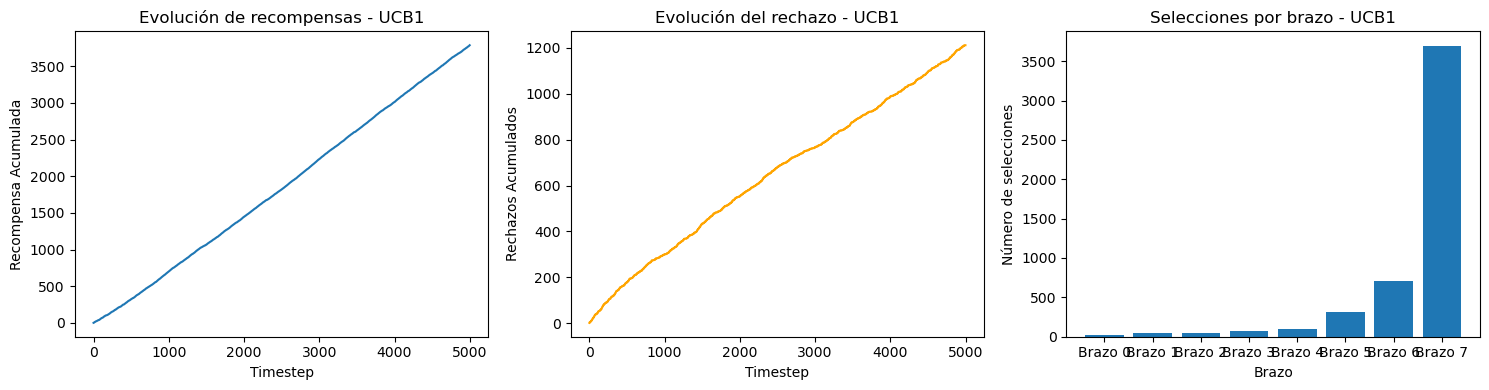

/var/folders/kd/kvpbk4vd51565q5qwqdz04cc0000gn/T/ipykernel_94957/3323778250.py:37: RuntimeWarning: invalid value encountered in sqrt
  ucb_values = self.values + np.sqrt((1 + alpha) * np.log(np.e * total_counts / tau) / (2 * tau))


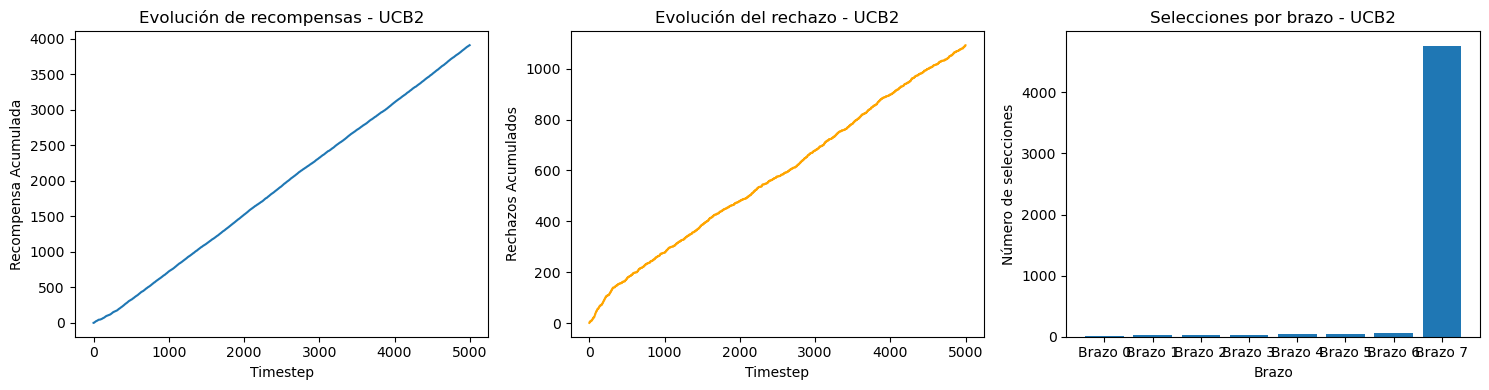

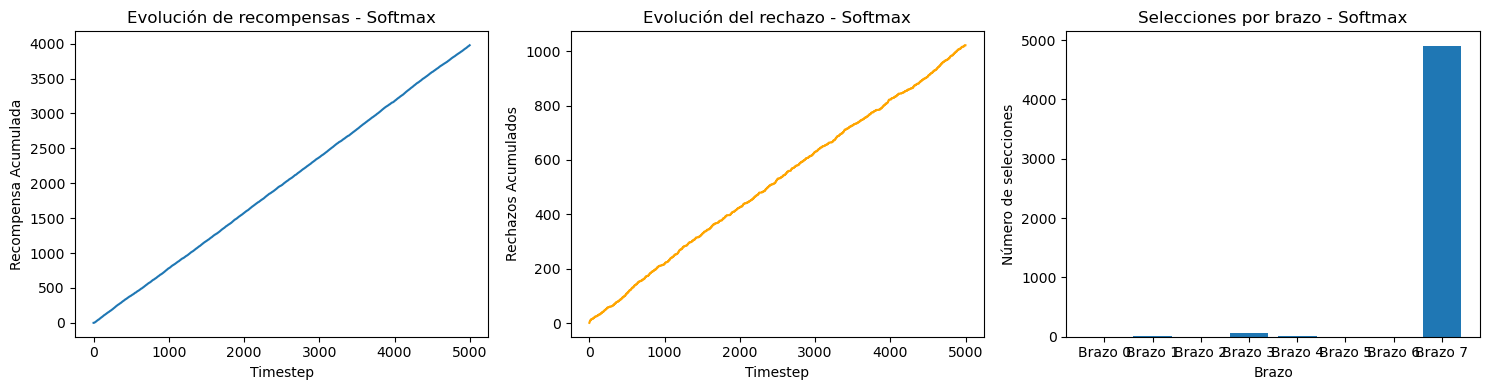

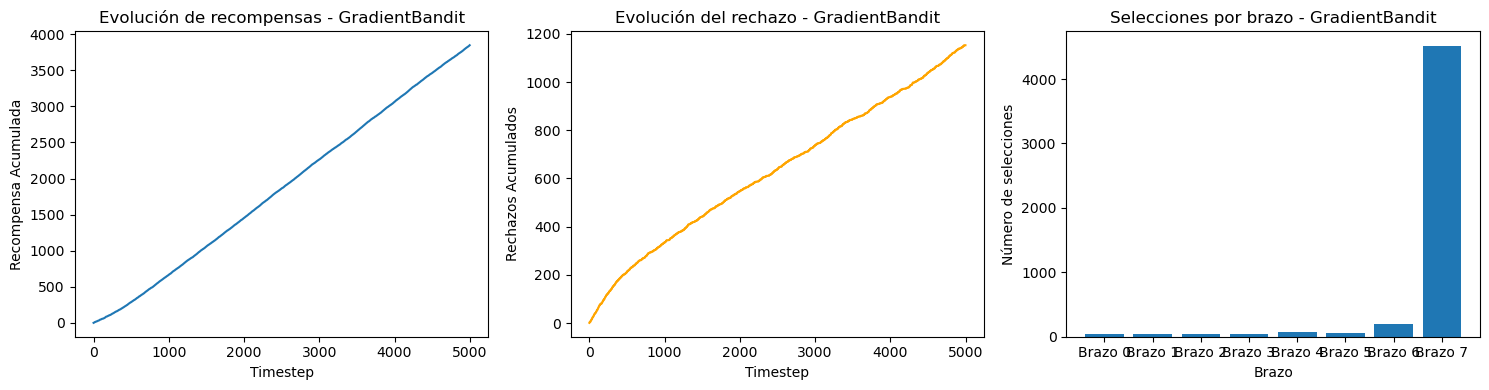

In [ ]:
# Notebook Ejercicio B - Extensiones de Machine Learning

# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Algoritmos UCB

class UCB1:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        total_counts = np.sum(self.counts)
        if total_counts < self.n_arms:
            return int(total_counts)
        ucb_values = self.values + np.sqrt(2 * np.log(total_counts) / (self.counts + 1e-5))
        return int(np.argmax(ucb_values))

    def update(self, chosen_arm, reward):
        chosen_arm = int(chosen_arm)
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward


class UCB2(UCB1):
    def select_arm(self):
        total_counts = np.sum(self.counts)
        if total_counts < self.n_arms:
            return int(total_counts)
        alpha = 0.1
        tau = np.ceil((1 + alpha) ** self.counts)
        ucb_values = self.values + np.sqrt((1 + alpha) * np.log(np.e * total_counts / tau) / (2 * tau))
        return int(np.argmax(ucb_values))


# Algoritmos basados en Gradiente

class Softmax:
    def __init__(self, n_arms, temperature=0.1):
        self.n_arms = n_arms
        self.temperature = temperature
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        exp_values = np.exp(self.values / self.temperature)
        probabilities = exp_values / np.sum(exp_values)
        return int(np.random.choice(range(self.n_arms), p=probabilities))

    def update(self, chosen_arm, reward):
        chosen_arm = int(chosen_arm)
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward


class GradientBandit:
    def __init__(self, n_arms, alpha=0.1):
        self.n_arms = n_arms
        self.preferences = np.zeros(n_arms)
        self.avg_reward = 0
        self.alpha = alpha
        self.counts = np.zeros(n_arms)

    def select_arm(self):
        exp_prefs = np.exp(self.preferences)
        self.probabilities = exp_prefs / np.sum(exp_prefs)
        return int(np.random.choice(range(self.n_arms), p=self.probabilities))

    def update(self, chosen_arm, reward):
        chosen_arm = int(chosen_arm)
        self.counts[chosen_arm] += 1
        self.avg_reward += (reward - self.avg_reward) / np.sum(self.counts)
        baseline = self.avg_reward
        self.preferences[chosen_arm] += self.alpha * (reward - baseline) * (1 - self.probabilities[chosen_arm])
        for arm in range(self.n_arms):
            if arm != chosen_arm:
                self.preferences[arm] -= self.alpha * (reward - baseline) * self.probabilities[arm]


# Función genérica de simulación
def simulate_bandit(n_arms, timesteps, algorithm, reward_func):
    rewards = np.zeros(timesteps)
    selections = np.zeros(n_arms)
    for t in range(timesteps):
        chosen_arm = algorithm.select_arm()
        reward = reward_func(chosen_arm)
        algorithm.update(chosen_arm, reward)
        rewards[t] = reward
        selections[chosen_arm] += 1
    return rewards, selections

# Parámetros de simulación
n_arms = 8
timesteps = 5000

# Distribución Bernoulli
bernoulli_probs = np.linspace(0.1, 0.8, n_arms)
bernoulli_reward = lambda arm: np.random.binomial(1, bernoulli_probs[int(arm)])


algorithms = [UCB1(n_arms), UCB2(n_arms), Softmax(n_arms), GradientBandit(n_arms)]
algorithm_names = ['UCB1', 'UCB2', 'Softmax', 'GradientBandit']

# Ejecutar simulaciones y mostrar gráficas para cada algoritmo
for algo, name in zip(algorithms, algorithm_names):
    rewards, selections = simulate_bandit(n_arms, timesteps, algo, bernoulli_reward)

    plt.figure(figsize=(15,4))

    # Evolución de recompensas
    plt.subplot(1,3,1)
    plt.plot(np.cumsum(rewards))
    plt.title(f'Evolución de recompensas - {name}')
    plt.xlabel('Timestep')
    plt.ylabel('Recompensa Acumulada')

    # Evolución del rechazo
    plt.subplot(1,3,2)
    rejects = np.cumsum(1 - rewards)
    plt.plot(rejects, color='orange')
    plt.title(f'Evolución del rechazo - {name}')
    plt.xlabel('Timestep')
    plt.ylabel('Rechazos Acumulados')

    # Selecciones por brazo
    plt.subplot(1,3,3)
    plt.bar(range(n_arms), selections)
    plt.title(f'Selecciones por brazo - {name}')
    plt.xlabel('Brazo')
    plt.ylabel('Número de selecciones')
    plt.xticks(range(n_arms), [f'Brazo {i}' for i in range(n_arms)])

    plt.tight_layout()
    plt.show()


In [ ]:

# Distribución Binomial
binomial_n = 10  # Número de ensayos
#binomial_p = np.linspace(0.1, 0.8, n_arms)  # Probabilidades por brazo
binomial_p = np.full(n_arms, 0.5)  # Probabilidad fija en 0.5 para todos los brazos
binomial_reward = lambda arm: np.random.binomial(binomial_n, binomial_p[int(arm)]) # Función de recompensa binomial con n ensayos y probabilidad p por brazo



/var/folders/kd/kvpbk4vd51565q5qwqdz04cc0000gn/T/ipykernel_94957/3323778250.py:37: RuntimeWarning: invalid value encountered in sqrt
  ucb_values = self.values + np.sqrt((1 + alpha) * np.log(np.e * total_counts / tau) / (2 * tau))


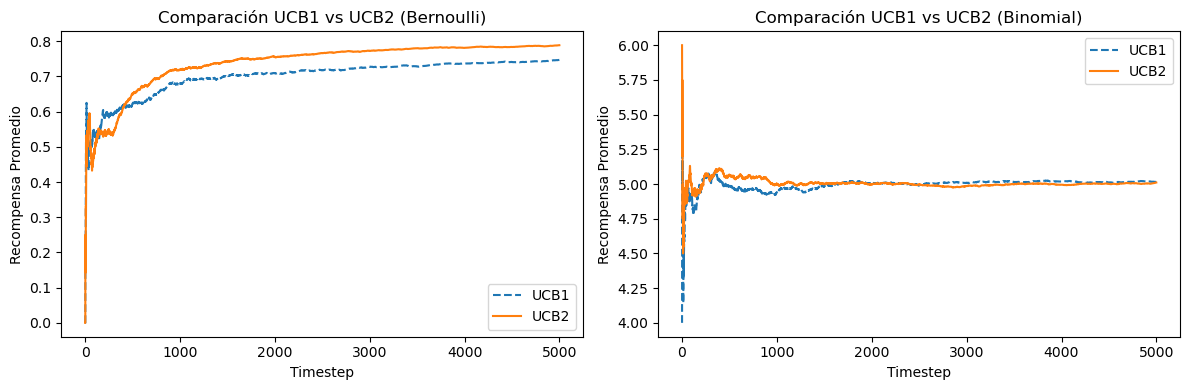

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, (dist_name, reward_func) in enumerate(zip(['Bernoulli', 'Binomial'], [bernoulli_reward, binomial_reward])):
    ucb1 = UCB1(n_arms)
    ucb2 = UCB2(n_arms)

    rewards_ucb1, _ = simulate_bandit(n_arms, timesteps, ucb1, reward_func)
    rewards_ucb2, _ = simulate_bandit(n_arms, timesteps, ucb2, reward_func)

    avg_rewards_ucb1 = np.cumsum(rewards_ucb1) / (np.arange(timesteps) + 1)
    avg_rewards_ucb2 = np.cumsum(rewards_ucb2) / (np.arange(timesteps) + 1)

    axes[i].plot(avg_rewards_ucb1, label='UCB1', linestyle='--')
    axes[i].plot(avg_rewards_ucb2, label='UCB2', linestyle='-')
    axes[i].set_title(f'Comparación UCB1 vs UCB2 ({dist_name})')
    axes[i].set_xlabel('Timestep')
    axes[i].set_ylabel('Recompensa Promedio')
    axes[i].legend()

plt.tight_layout()
plt.show()


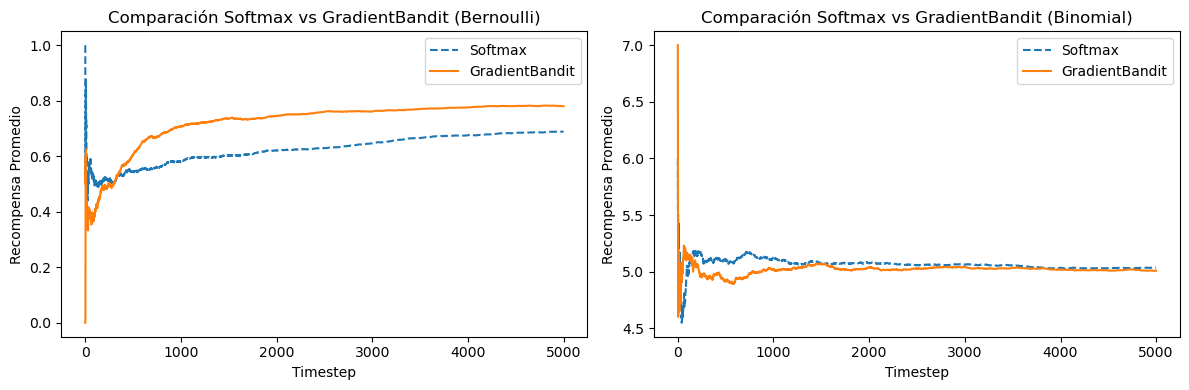

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, (dist_name, reward_func) in enumerate(zip(['Bernoulli', 'Binomial'], [bernoulli_reward, binomial_reward])):
    softmax = Softmax(n_arms)
    gradient = GradientBandit(n_arms)

    rewards_softmax, _ = simulate_bandit(n_arms, timesteps, softmax, reward_func)
    rewards_gradient, _ = simulate_bandit(n_arms, timesteps, gradient, reward_func)

    avg_rewards_softmax = np.cumsum(rewards_softmax) / (np.arange(timesteps) + 1)
    avg_rewards_gradient = np.cumsum(rewards_gradient) / (np.arange(timesteps) + 1)

    axes[i].plot(avg_rewards_softmax, label='Softmax', linestyle='--')
    axes[i].plot(avg_rewards_gradient, label='GradientBandit', linestyle='-')
    axes[i].set_title(f'Comparación Softmax vs GradientBandit ({dist_name})')
    axes[i].set_xlabel('Timestep')
    axes[i].set_ylabel('Recompensa Promedio')
    axes[i].legend()

plt.tight_layout()
plt.show()


/var/folders/kd/kvpbk4vd51565q5qwqdz04cc0000gn/T/ipykernel_94957/3323778250.py:37: RuntimeWarning: invalid value encountered in sqrt
  ucb_values = self.values + np.sqrt((1 + alpha) * np.log(np.e * total_counts / tau) / (2 * tau))


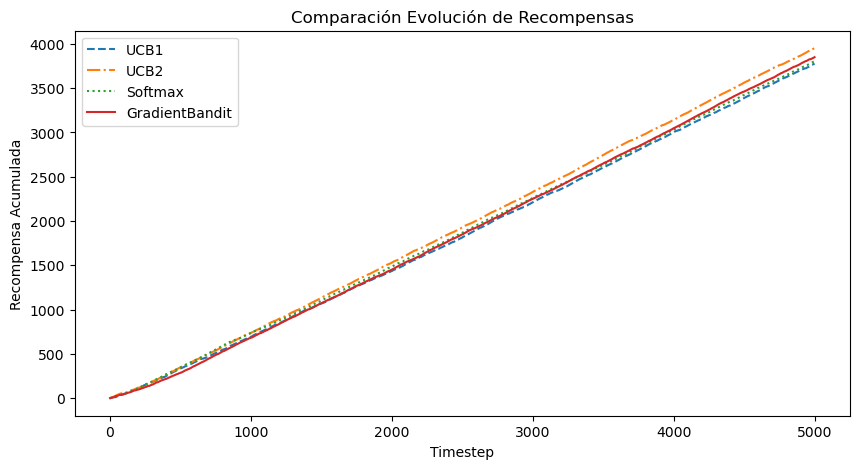

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))

# Instanciar algoritmos
ucb1 = UCB1(n_arms)
ucb2 = UCB2(n_arms)
softmax = Softmax(n_arms)
gradient = GradientBandit(n_arms)

# Obtener recompensas acumuladas
rewards_ucb1, _ = simulate_bandit(n_arms, timesteps, ucb1, bernoulli_reward)
rewards_ucb2, _ = simulate_bandit(n_arms, timesteps, ucb2, bernoulli_reward)
rewards_softmax, _ = simulate_bandit(n_arms, timesteps, softmax, bernoulli_reward)
rewards_gradient, _ = simulate_bandit(n_arms, timesteps, gradient, bernoulli_reward)

# Calcular recompensa acumulada
cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
cumulative_rewards_ucb2 = np.cumsum(rewards_ucb2)
cumulative_rewards_softmax = np.cumsum(rewards_softmax)
cumulative_rewards_gradient = np.cumsum(rewards_gradient)

# Graficar
ax.plot(cumulative_rewards_ucb1, label='UCB1', linestyle='--')
ax.plot(cumulative_rewards_ucb2, label='UCB2', linestyle='-.')
ax.plot(cumulative_rewards_softmax, label='Softmax', linestyle=':')
ax.plot(cumulative_rewards_gradient, label='GradientBandit', linestyle='-')

ax.set_title('Comparación Evolución de Recompensas')
ax.set_xlabel('Timestep')
ax.set_ylabel('Recompensa Acumulada')
ax.legend()

plt.show()
